In [2]:
import json
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

[(3.2483750000000002, 10.21485), (8.579827, 11.28638), (21.994254, 25.961012), (18.27632, 22.606091), (3.119515, 3.12202)]
2.860489720959603


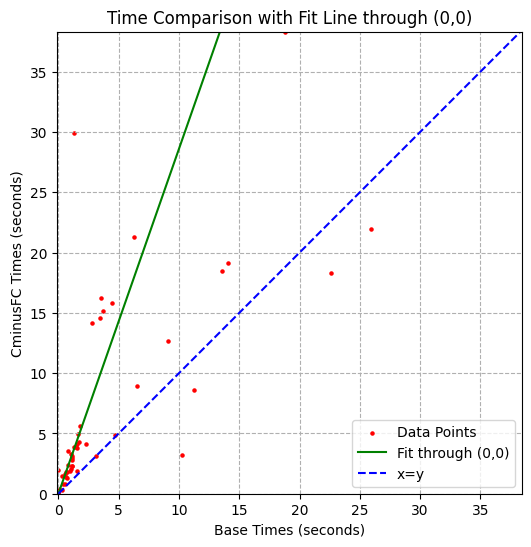

In [5]:
base_time_dir = "./20240413-223928-performance-g++/test.json" # g++ with O3
base_time_json = json.load(open(base_time_dir))
# cminusfc_time_dir = "./20240413-220514-performance-cminusfc/test.json"
cminusfc_time_dir = "./20240414-135419-performance-cminusfc/test.json"
cminusfc_time_json = json.load(open(cminusfc_time_dir))
# merge the two json files

# draw the graph
cminusfc_times = [details['time'] for details in cminusfc_time_json.values()]
base_times = [details['time'] for details in base_time_json.values()]

# 创建散点图，s参数控制点的大小
plt.figure(figsize=(6, 6))
plt.scatter(base_times, cminusfc_times, color='r', label='Data Points', s=5)  # 点的大小设置为10

# 计算从原点出发的直线拟合的斜率a
# 由于要求直线从原点出发，我们只计算斜率a
# a = np.mean(np.array(cminusfc_times) / np.array(base_times))
# print(np.array(cminusfc_times) / np.array(base_times))
# 去除掉二者都小于0.1的点计算平均值
a = np.mean([cminusfc_times[i] / base_times[i] for i in range(len(base_times)) if cminusfc_times[i] > 0.1 and base_times[i] > 0.1])
# 输出都小于0.1的点
print([(cminusfc_times[i], base_times[i]) for i in range(len(base_times)) if cminusfc_times[i] < base_times[i]])
print(a)

# 绘制拟合直线，从原点出发
max_time = max(max(cminusfc_times), max(base_times))
min_time = min(min(cminusfc_times), min(base_times))
plt.plot([0, max_time], [0, a*max_time], 'g-', label='Fit through (0,0)')

# 绘制x=y的线
plt.plot([0, max_time], [0, max_time], 'b--', label='x=y')

# 设置x轴和y轴的范围，确保刻度间隔相同
plt.axis('equal')
plt.xlim(0, max_time)
plt.ylim(0, max_time)

plt.title('Time Comparison with Fit Line through (0,0)')
plt.xlabel('Base Times (seconds)')
plt.ylabel('CminusFC Times (seconds)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()




